In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [3]:
df=pd.read_csv('data.csv') # load csv to dataframe
print(df.shape)
df.head()

(1878, 9)


,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [4]:
df.describe()

,Unnamed: 0,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
count,1878.000000,1.878000e+03,1878.000000,1878.000000,1878.000000,1878.000000,926.000000
mean,938.500000,8.014925e+07,1.216796,1.941402,8.602769,8.235357,21.207775
std,542.276221,1.227237e+05,0.568129,0.936656,14.981958,11.510945,13.069028
min,0.000000,8.002835e+07,0.520000,0.660000,0.000000,0.000000,1.490000
25%,469.250000,8.002835e+07,0.674928,1.055314,0.000000,0.000000,12.847500
50%,938.500000,8.010192e+07,0.978451,1.546338,0.000000,0.000000,19.220000
75%,1407.750000,8.031748e+07,1.991321,3.216415,18.000000,15.000000,27.430000
max,1877.000000,8.031748e+07,2.150000,3.490000,144.000000,85.000000,93.520000


In [5]:
df[df.duplicated(keep=False)] # shows duplicated rows

,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue


In [6]:
df['purchase_price']=pd.to_numeric(df['purchase_price'])
df['suggested_retail_price']=pd.to_numeric(df['suggested_retail_price'])
df['orders_quantity']=pd.to_numeric(df['orders_quantity'])
df['sales_quantity']=pd.to_numeric(df['sales_quantity'])
df['revenue']=pd.to_numeric(df['revenue'])
df['date']=pd.to_datetime(df['day'])

df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['weekday']=df['date'].dt.day_name()
df['year']=df['date'].dt.year
df.head()

,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,date,month,weekday,year
0,0,9,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55,2022-02-09,2,Wednesday,2022
1,1,9,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55,2022-02-09,2,Wednesday,2022
2,2,9,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47,2022-02-09,2,Wednesday,2022
3,3,9,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47,2022-02-09,2,Wednesday,2022
4,4,9,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84,2022-02-09,2,Wednesday,2022


In [9]:
unique_items=df.item_name.unique() # unique items
unique_items

array(['ROMA TOMATEN ES I 500G SF', 'SL MANDARINEN BEH.ES I 750G GS',
       'UH ZWIEBELN DE-HE I 1KG GS'], dtype=object)

In [37]:
def plot_item_graph(item):
    "takes an item and plots its sales quantity according to the date"
    plt.figure(figsize=(16,8))
    df1=df.loc[df['item_name']==item]
    df1=df1.sort_values(by='date')
    plt.plot(df1['date'], df1['sales_quantity'], label='Sales quantity')
    plt.plot(df1['date'], df1['sales_quantity'].rolling(7).mean(),label= 'Moving Average of sales of 7D')
    
    plt.xlabel('Date')
    plt.ylabel('Sales quantity')
    plt.title("Total sales done for item = "+item)
    plt.legend()
    plt.show()

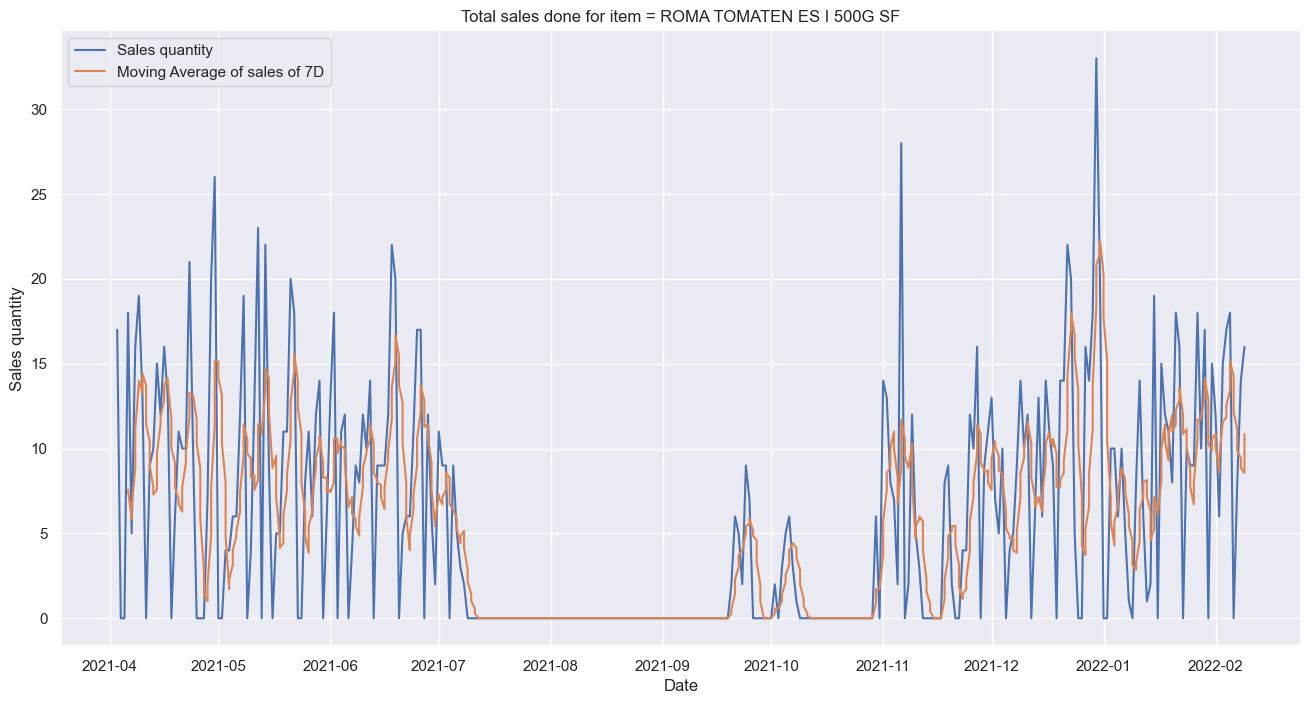

In [38]:
plot_item_graph(unique_items[0])

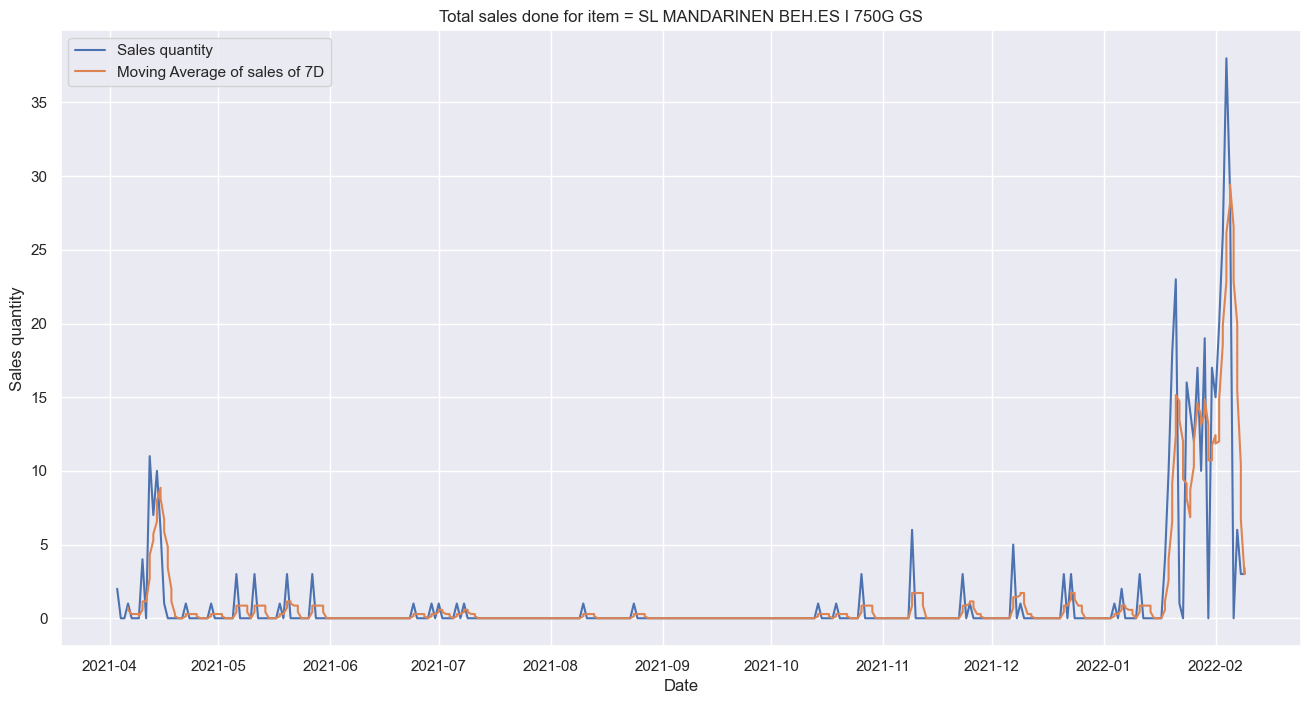

In [39]:
plot_item_graph(unique_items[1])

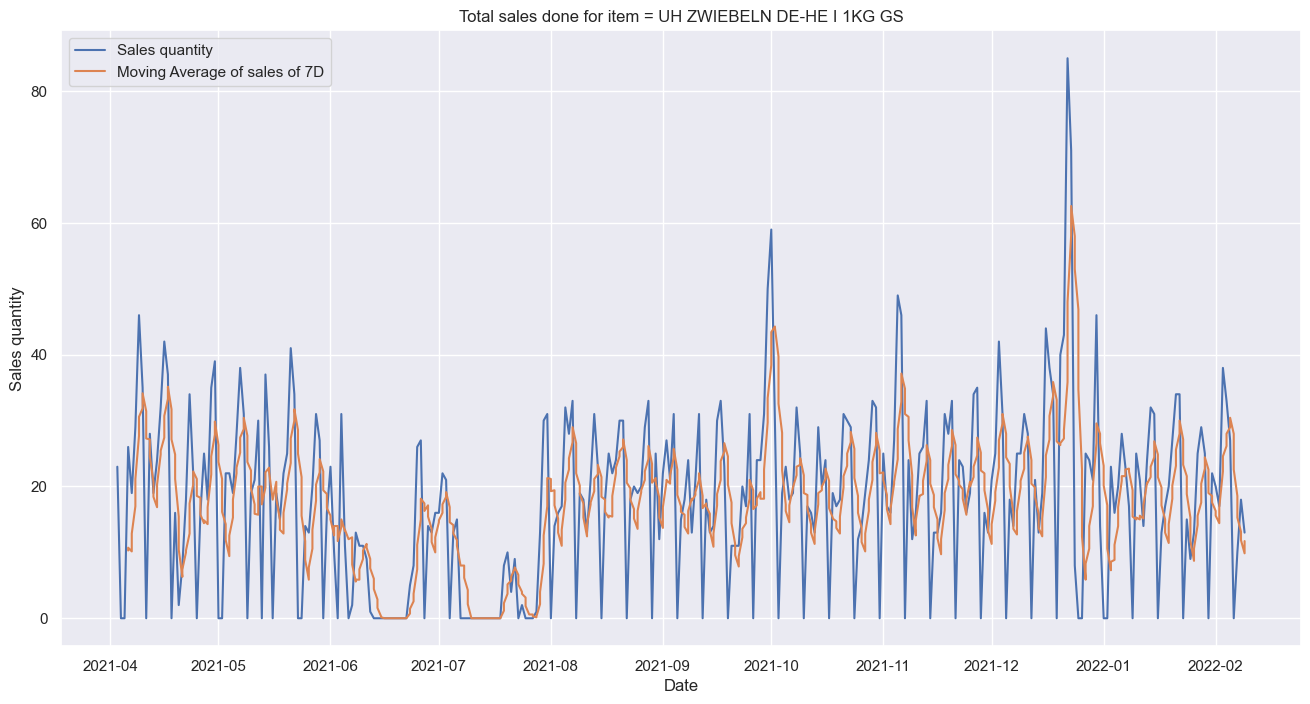

In [40]:
plot_item_graph(unique_items[2])

In [44]:
def auto_correlation(item):
    "will tell the similarity between the current and past values of the timeseries"
    df1=df.loc[df['item_name']==item]
    x = pd.plotting.autocorrelation_plot(df1['sales_quantity'])
    x.plot()
    plt.title("Autocorrelation for item="+item)
    
    plt.show()


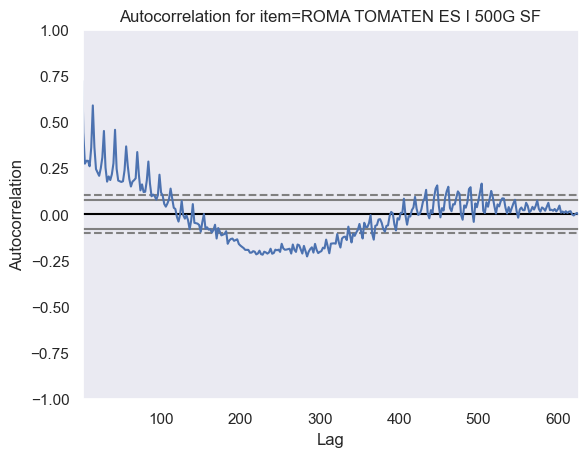

In [45]:
auto_correlation(unique_items[0])

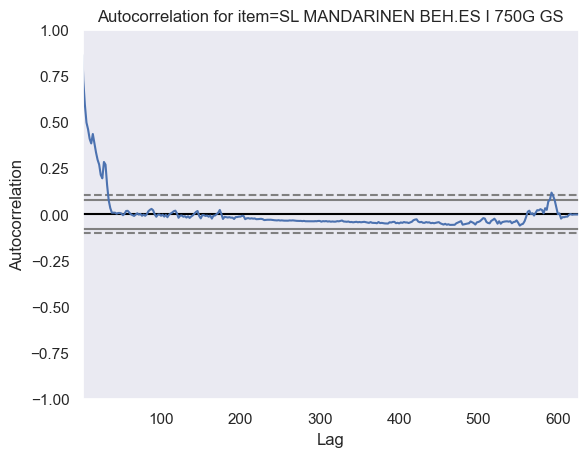

In [46]:
auto_correlation(unique_items[1])

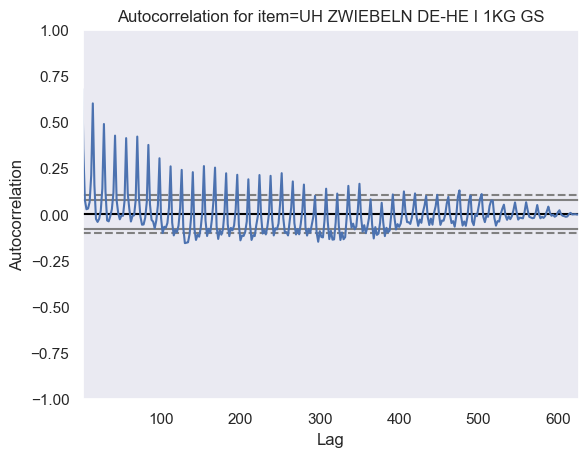

In [47]:
auto_correlation(unique_items[2])